# ML Modeling, Linear Model
Goal
---
1. scikit-learning Introduction
2. CO2 emisssion 

Reference
---
1. [src](https://medium.com/joguei-os-dados/week-3-predicting-co2-emissions-70e554ad2276)
2. [Dataset, Kaggle](https://www.kaggle.com/gangliu/oc2emission/tasks), dataset contains information of CO2 emission from cars.

Questions
---
1. what is the correlation between the engine motor of the car and its CO2 emission? 
2. Is it possible to create a model that predicts the amount of polution on future motors? How and Why?

In [7]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

#matplotlib inline

In [ ]:
## atributing dataset to a dataframe df
df = pd.read_csv('data/FuelConsumptionCo2.csv')
df.head(2)

In [ ]:
# describing statiscal measures
df.describe()

### Exploratory analysis
1. correwlation between pairs

In [ ]:
df.info()

In [18]:
num_features=list(df.select_dtypes(include='number').columns)

In [ ]:
# correlation matrix to measure the strenght of the correlation between features
plt.figure(figsize=(13,5))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [ ]:
# correlation matrix to measure the strenght of the correlation between features
plt.figure(figsize=(13,5))
corr = df[num_features[1:]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [26]:
# only one category
df['MODELYEAR'].nunique()

1

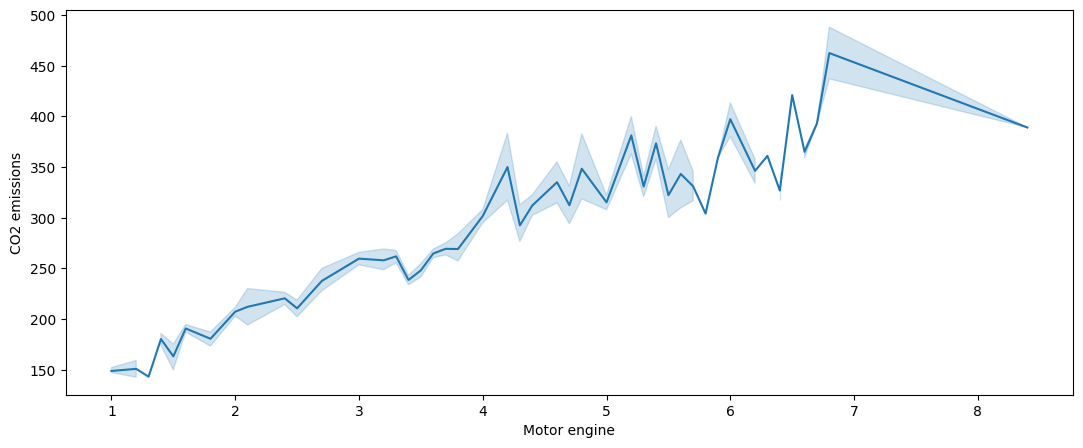

In [29]:
# ploting graph engine size x CO2 emissions
plt.figure(figsize=(13,5))
sns.lineplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])
plt.xlabel('Motor engine')
plt.ylabel('CO2 emissions')
plt.show()

The lineplot shows a positive correlation between the size/power of the engine motor and the carbon emission. With some variation, we can say that the bigger the engine the greater the levels of CO2 emited. 

[BONUS]
---
What are the differences of the techniques of Car manufacture among different countries?

In [ ]:
!pip install mplcyberpunk

In [ ]:
df['MAKE'].unique()

In [ ]:
df.groupby('MAKE')[['ENGINESIZE','CYLINDERS']].agg(pd.Series.mode)
#com_df.loc['TOYOTA','ENGINESIZE']=2.5
#com_df.loc['BENTLEY','CYLINERS']=10


In [ ]:
com_df=df.groupby('MAKE')[['ENGINESIZE','CYLINDERS']].agg(lambda x:x.mode()[0]).reset_index()

In [ ]:
com_df.index

In [ ]:
com_df=com_df.loc[['AUDI','BMW','CHEVROLET','HYUNDAI', 'LINCOLN','PORSCHE','TOYOTA']]
com_df

In [ ]:
com_df

In [114]:
MAKER=list(com_df.index)
Enginesize=list(com_df['ENGINESIZE'])
Cylinders=list(com_df['CYLINDERS'])

In [115]:
MAKER = [*MAKER, MAKER[0]]
Enginesize = [*Enginesize, Enginesize[0]]
Cylinders = [*Cylinders, Cylinders[0]]

Maker = np.linspace(start=0, stop=2 * np.pi, num=len(MAKER))

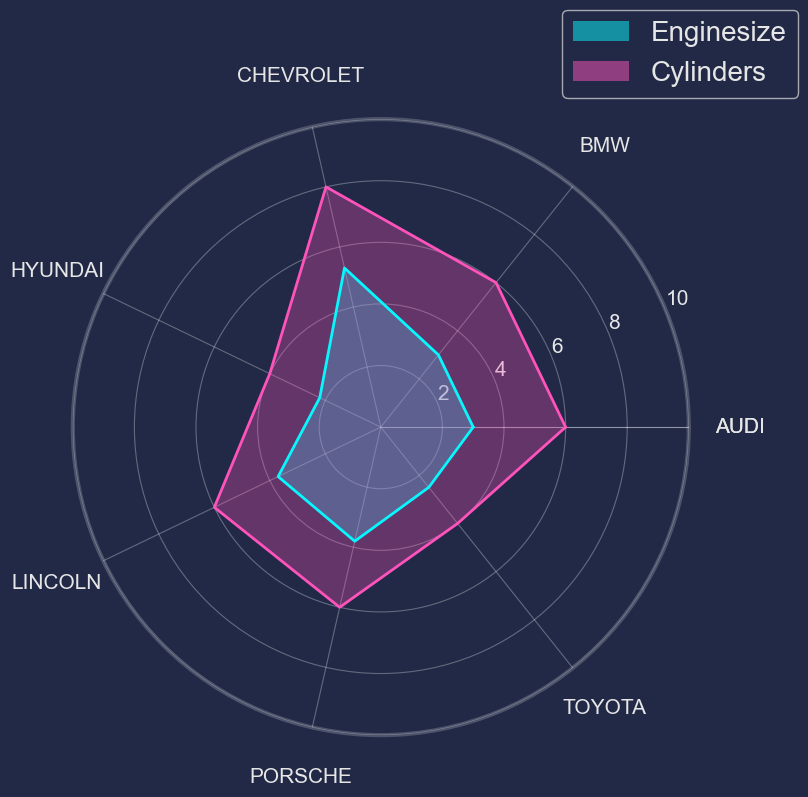

In [122]:
from matplotlib.patches import Patch
import mplcyberpunk

with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

    ax.plot(Maker, Enginesize, lw=2)
    ax.plot(Maker, Cylinders, lw=2)

    ax.fill(Maker, Enginesize, alpha=0.3)
    ax.fill(Maker, Cylinders, alpha=0.3)

    lines, labels = plt.thetagrids(np.degrees(Maker), labels=MAKER)

    ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

    ax.spines['polar'].set_linewidth(3)
    
    edge_color = (1, 1, 1, 0.2) 
    ax.spines['polar'].set_color(edge_color) 
    
    ax.grid(color='white', alpha=0.3)
    
    ax.set_ylim(0, 10)
    
    # Create custom legend handles
    Enginesize_legend = Patch(facecolor='C0', alpha=0.5, label='Enginesize')
    Cylinders_legend = Patch(facecolor='C1', alpha=0.5, label='Cylinders')

    # Add a legend with custom position and handles
    ax.legend(handles=[well1_legend, well2_legend],
              bbox_to_anchor=(1.2, 1.2), fontsize=20, 
              frameon=True)


    plt.show()

Model selection
---
1. what is the suitable model?
2. ML Modeling 
3  prediction/Estimation and Error discussion

### Spliting data to train the model

In [123]:
# importing necessary libraries
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [125]:
# features into variables
engine= df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]


In [ ]:
# ploting the correlation between features
plt.scatter(engine, co2, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

The datapoints on the scatterplot indicates that is possible to do a linear regression with this dataset, although the amount of residual.

In [127]:
# spliting data in train and test with train_test_split
engine_train, engine_test, co2_train, co2_test = train_test_split(engine, co2, test_size=0.2, random_state=42)

In [ ]:
# ploting the correlation between features
plt.scatter(engine_train, co2_train, color='blue')
plt.xlabel('engine')
plt.ylabel('co2 emission')
plt.show()

### Creating the model with the train dataset

In [131]:
# creating a linear regression model
# LinearRegression is a method of sklearn
modelo = linear_model.LinearRegression()

In [ ]:
# linear regression formula: (Y = A + B.X)
# training the model to obtain the values of A and B (always do it in the train dataset)
modelo.fit(engine_train, co2_train)

Estimated Linear Model
---
Data: $(x^i,y^i)$'s pair
$$ \hat y= A x+B$$

In [133]:
# exibiting the coeficients A and B that the model generated
print(f'(B) intercept: {modelo.intercept_} | (A) inclination: {modelo.coef_}')

(B) intercept: [126.28970217] | (A) inclination: [[38.99297872]]


In [ ]:
# print linear regression line on our TRAIN dataset
plt.scatter(engine_train, co2_train, color='blue')
plt.plot(engine_train, modelo.coef_[0][0]*engine_train + modelo.intercept_[0], '-r') 

plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Executing the model on the test dataset
First: predictions on the 'test' dataset

In [136]:
predictCO2 = modelo.predict(engine_test)

In [ ]:
# print linear regression line on our TEST dataset
plt.scatter(engine_test, co2_test, color='green')
plt.plot(engine_test, modelo.coef_[0][0]*engine_test + modelo.intercept_[0], '-r')
plt.ylabel('CO2 emissions')
plt.xlabel('Engine')
plt.show()

### Evaluating the model

In [138]:
# Showing metrics to check the acuracy of our model
print(f'Sum of squared error (SSE): {np.sum((predictCO2 - co2_test)**2)}') # SSE: sum all of the  residuals and square them. 
print(f'Mean squared error (MSE): {mean_squared_error(co2_test, predictCO2)}') # MSE: avg of SSE
print(f'Mean absolute error (MAE): {mean_absolute_error(co2_test, predictCO2)}')
print (f'Sqrt of mean squared error (RMSE):  {sqrt(mean_squared_error(co2_test, predictCO2))}') # RMSE: sqrt of the MSE
print(f'R2-score: {r2_score(predictCO2, co2_test)}') # r2-score: explains the variance of the variable Y when it comes to X

Sum of squared error (SSE): CO2EMISSIONS    210990.768215
dtype: float64
Mean squared error (MSE): 985.9381692274999
Mean absolute error (MAE): 24.09725741170784
Sqrt of mean squared error (RMSE):  31.399652374309813
R2-score: 0.6782015355440534


All of the metrics above help evaluate the acuracy of the model. r2, for instance, is 0.68: this means that our linear regression model (values A and B given) is able to explain 68% of the variance between the CO2 emission and engine of the cars. 

The usual benchmark for this metric is 0.70.

[Group Practicing]
---
As same as the processing for estimated between `Engingesize ➡︎ CO2 emission`, now consider make a practicing for
`Cylinders ➡︎ CO2 emission`.